# Question 1

In [1]:
#import packages
import numpy as np
import pandas as pd
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt

In [2]:
#import csv files
'''
data_train_100_10 = pd.read_csv('C:\\Users\\Yofftop\\Documents\\Fordham Masters\\CISC 6930 - Data Mining\\Homework1\\train-100-10.csv')
data_test_100_10 = pd.read_csv('C:\\Users\\Yofftop\\Documents\\Fordham Masters\\CISC 6930 - Data Mining\\Homework1\\test-100-10.csv')
data_train_100_100 = pd.read_csv('C:\\Users\\Yofftop\\Documents\\Fordham Masters\\CISC 6930 - Data Mining\\Homework1\\train-100-100.csv')
data_test_100_100 = pd.read_csv('C:\\Users\\Yofftop\\Documents\\Fordham Masters\\CISC 6930 - Data Mining\\Homework1\\test-100-100.csv')
data_train_1000_100 = pd.read_csv('C:\\Users\\Yofftop\\Documents\\Fordham Masters\\CISC 6930 - Data Mining\\Homework1\\train-1000-100.csv')
data_test_1000_100 = pd.read_csv('C:\\Users\\Yofftop\\Documents\\Fordham Masters\\CISC 6930 - Data Mining\\Homework1\\test-1000-100.csv')
data_train_50_1000_100 = pd.read_csv('C:\\Users\\Yofftop\\Documents\\Fordham Masters\\CISC 6930 - Data Mining\\Homework1\\train-50(1000)-100.csv')
data_train_100_1000_100 = pd.read_csv('C:\\Users\\Yofftop\\Documents\\Fordham Masters\\CISC 6930 - Data Mining\\Homework1\\train-100(1000)-100.csv')
data_train_150_1000_100 = pd.read_csv('C:\\Users\\Yofftop\\Documents\\Fordham Masters\\CISC 6930 - Data Mining\\Homework1\\train-150(1000)-100.csv')
'''
data_train_100_10 = pd.read_csv('train-100-10.csv')
data_test_100_10 = pd.read_csv('test-100-10.csv')
data_train_100_100 = pd.read_csv('train-100-100.csv')
data_test_100_100 = pd.read_csv('test-100-100.csv')
data_train_1000_100 = pd.read_csv('train-1000-100.csv')
data_test_1000_100 = pd.read_csv('test-1000-100.csv')
data_train_50_1000_100 = pd.read_csv('train-50(1000)-100.csv')
data_train_100_1000_100 = pd.read_csv('train-100(1000)-100.csv')
data_train_150_1000_100 = pd.read_csv('train-150(1000)-100.csv')



In [3]:
#Function to plot test and training data in terms of MSE

def fun_plot(train,test,lmda_min,lmda_max,data_name):

    #create matrices
    matrix_train = np.matrix(train)
    matrix_test = np.matrix(test)
    
    #determine shape of matrices
    mtrainshape = matrix_train.shape
    numcol_train = mtrainshape[1]
    numrow_train = mtrainshape[0]
    
    mtestshape = matrix_test.shape
    numcol_test = mtestshape[1]
    numrow_test = mtestshape[0]
    
    #create vector y
    y_train = matrix_train[:,(numcol_train-1)]
    #create x matrix
    x_train = matrix_train[:,:(numcol_train-1)]
    #append intercept
    constant_train = np.ones((numrow_train,1), dtype=float)
    x_train = np.hstack((constant_train,x_train))
    #create transpose x matrix
    xt_train = x_train.transpose()
    
    #create vector y
    y_test = matrix_test[:,(numcol_test-1)]
    #create x matrix
    x_test = matrix_test[:,:(numcol_test-1)]
    #append intercept
    constant_test = np.ones((numrow_test,1), dtype=float)
    x_test = np.hstack((constant_test,x_test))
    #create transpose x matrix
    xt_test = x_test.transpose()
    
    #Calculate lambda 0-150
    #then take each of those Ws and find the MSE
    id = np.identity(numcol_train)
    MSE_train=[]
    MSE_test=[]
    for i in range(lmda_min,(lmda_max+1)):
        w_reg = np.matmul((inv(np.matmul(xt_train,x_train)+(i*id))),(np.matmul(xt_train,y_train))) 
        MSE_train.append((1/numrow_train)*(norm(np.matmul(x_train,w_reg)-y_train)**2))
        MSE_test.append((1/numrow_test)*(norm(np.matmul(x_test,w_reg)-y_test)**2))
    
    #plot data
    plt.plot(MSE_test, label=("test " + data_name))
    plt.plot(MSE_train, label=("training " + data_name))
    plt.legend(loc = 1, prop={'size': 10})
    plt.ylabel("MSE")
    plt.xlabel("Lambda")
    plt.ylim(0,30)
    
    print("The minimum lambda for test in data set " + data_name + " is:" + str(MSE_test.index(min(MSE_test))))

Implement L2 regularized linear regression algorithm with λ ranging from 0 to 150 (integers only). For each of the 6 dataset, plot both the training set MSE and the test set MSE as a function of λ (x-axis) in one graph.
(a) For each dataset, which λ value gives the least test set MSE? 

The minimum lambda for test in data set 100-10 is:9


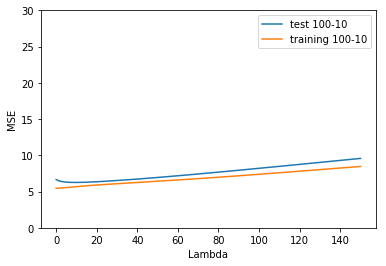

In [4]:
fun_plot(data_train_100_10, data_test_100_10, 0, 150,"100-10")

The minimum lambda for test in data set 100-100 is:24


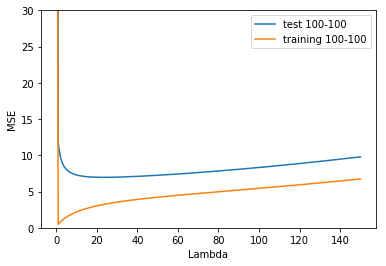

In [5]:
fun_plot(data_train_100_100, data_test_100_100, 0, 150,"100-100")

The minimum lambda for test in data set 1000-100 is:45


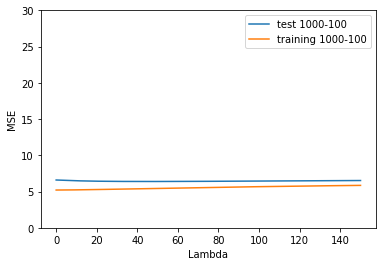

In [6]:
fun_plot(data_train_1000_100, data_test_1000_100, 0, 150,"1000-100")

The minimum lambda for test in data set 50(1000)-100 is:12


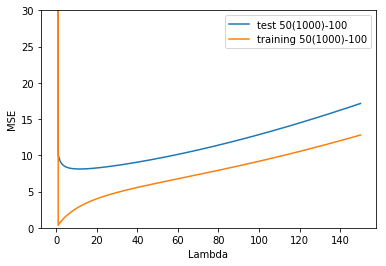

In [7]:
fun_plot(data_train_50_1000_100, data_test_1000_100, 0, 150,"50(1000)-100")

The minimum lambda for test in data set 100(1000)-100 is:25


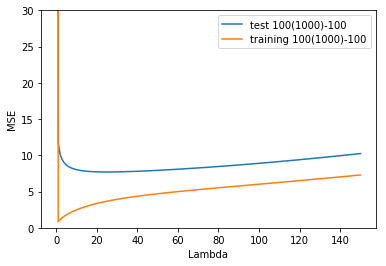

In [8]:
fun_plot(data_train_100_1000_100, data_test_1000_100, 0, 150,"100(1000)-100")

The minimum lambda for test in data set 150(1000)-100 is:31


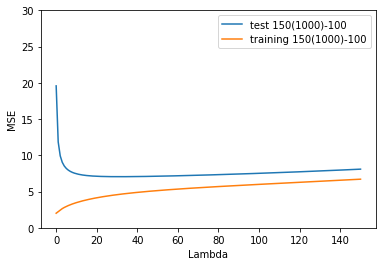

In [9]:
fun_plot(data_train_150_1000_100, data_test_1000_100, 0, 150,"150(1000)-100")

(b) For each of datasets 100-100, 50(1000)-100, 100(1000)-100, provide an additional graph with λ ranging from 1 to 150. 

The minimum lambda for test in data set 100-100 is:23


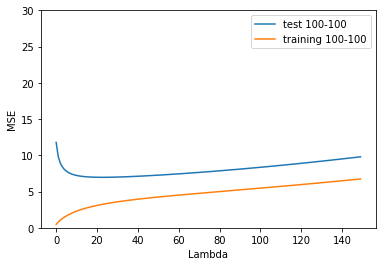

In [10]:
fun_plot(data_train_100_100, data_test_100_100, 1, 150,"100-100")


The minimum lambda for test in data set 50(1000)-100 is:11


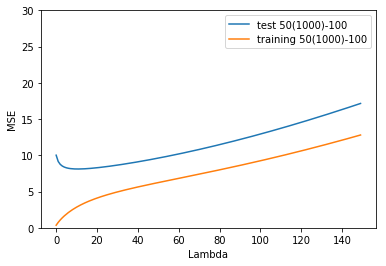

In [11]:
fun_plot(data_train_50_1000_100, data_test_1000_100, 1, 150,"50(1000)-100")

The minimum lambda for test in data set 100(1000)-100 is:24


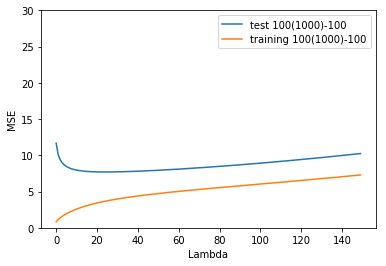

In [12]:
fun_plot(data_train_100_1000_100, data_test_1000_100, 1, 150,"100(1000)-100")

(c) Explain why λ = 0 (i.e., no regularization) gives abnormally large MSEs for those
three datasets in (b).

Answer: When lambda is equal to 0, there is no punishment given for high degree polynomials. Hence, the model may be subject to overfitting and high variance. Ideally, in the variance-bias trade off, there is an equal amount of bias and variance, which is what regularization helps with.

In comparing data sets in question b with a, we can see very clearly that with very low or no regularization, MSE is high. The ideal lambda for this data set are more likely in the 10-40 range.

# Question 2

From the plots in question 1, we can tell which value of λ is best for each dataset oncewe know  the test data and its labels. This is not realistic in real world applications. In
this part, we use cross validation (CV) to set the value for λ. Implement the 10-fold CV technique discussed in class (pseudo code given in Appendix A) to select the best λ value from the training set.

In [13]:
from sklearn.model_selection import KFold
from numpy import mean, average, median

def fun_CV(train,k,lmda_min,lmda_max,data_name):
   
    matrix_train = np.matrix(train)
    
    mtrainshape = matrix_train.shape
    numcol_train = mtrainshape[1]
    numrow_train = mtrainshape[0]
    
    #create vector y
    y_train = matrix_train[:,(numcol_train-1)]
    #create x matrix
    x_train = matrix_train[:,:(numcol_train-1)]
    #append intercept
    constant_train = np.ones((numrow_train,1), dtype=float)
    x_train = np.hstack((constant_train,x_train))

    MSE_val=[]
        
    for i in range(lmda_min,(lmda_max+1)):
        MSECV_val=[]
        
        kf = KFold(n_splits=k)
        for train, val in kf.split(x_train, y_train):
        
            xcv_train = x_train[train]
            ycv_train = y_train[train]
            xtcv_train = xcv_train.T

            xcv_val = x_train[val]
            ycv_val = y_train[val]
            xtcv_val = xcv_val.T

            cvtrainshape = xcv_train.shape
            numcol_traincv = cvtrainshape[1]
            numrow_traincv = cvtrainshape[0]

            cvvalshape = xcv_val.shape
            numcol_valcv = cvvalshape[1]
            numrow_valcv = cvvalshape[0]

            id = np.identity(numcol_traincv)
   
            w_reg = np.matmul((inv(np.matmul(xtcv_train,xcv_train)+(i*id))),(np.matmul(xtcv_train,ycv_train))) 
            #MSECV_train.append((1/numrow_traincv)*(norm(np.matmul(xcv_train,w_reg)-ycv_train)**2))
            MSECV_val.append((1/numrow_valcv)*(norm(np.matmul(xcv_val,w_reg)-ycv_val)**2))
            
        MSECV_avg = average(MSECV_val)
        
        MSE_val.append(MSECV_avg)
            
    print("The minimum lambda using cross validation for test in data set " + data_name + " is: " + str(MSE_val.index(min(MSE_val))))

(a) Using CV technique, what is the best choice of λ value and the corresponding test set MSE for each of the six datasets?

In [14]:
fun_CV(data_train_100_10,10,0,150,"100-10")
fun_CV(data_train_100_100,10,0,150,"100-100")
fun_CV(data_train_1000_100,10,0,150,"1000-100")
fun_CV(data_train_50_1000_100,10,0,150,"50(1000)-100")
fun_CV(data_train_100_1000_100,10,0,150,"100(1000)-100")
fun_CV(data_train_150_1000_100,10,0,150,"150(1000)-100")

The minimum lambda using cross validation for test in data set 100-10 is: 11
The minimum lambda using cross validation for test in data set 100-100 is: 11
The minimum lambda using cross validation for test in data set 1000-100 is: 59
The minimum lambda using cross validation for test in data set 50(1000)-100 is: 13
The minimum lambda using cross validation for test in data set 100(1000)-100 is: 15
The minimum lambda using cross validation for test in data set 150(1000)-100 is: 38


In [15]:
def compare(train,test,lmda_min,lmda_max,k,data_name):
    #create matrices
    matrix_train = np.matrix(train)
    matrix_test = np.matrix(test)
    
    #determine shape of matrices
    mtrainshape = matrix_train.shape
    numcol_train = mtrainshape[1]
    numrow_train = mtrainshape[0]
    
    mtestshape = matrix_test.shape
    numcol_test = mtestshape[1]
    numrow_test = mtestshape[0]
    
    #create vector y
    y_train = matrix_train[:,(numcol_train-1)]
    #create x matrix
    x_train = matrix_train[:,:(numcol_train-1)]
    #append intercept
    constant_train = np.ones((numrow_train,1), dtype=float)
    x_train = np.hstack((constant_train,x_train))
    #create transpose x matrix
    xt_train = x_train.transpose()
    
    #create vector y
    y_test = matrix_test[:,(numcol_test-1)]
    #create x matrix
    x_test = matrix_test[:,:(numcol_test-1)]
    #append intercept
    constant_test = np.ones((numrow_test,1), dtype=float)
    x_test = np.hstack((constant_test,x_test))
    #create transpose x matrix
    xt_test = x_test.transpose()
    
    #Calculate lambda 0-150
    #then take each of those Ws and find the MSE
    id = np.identity(numcol_train)
    MSE_train=[]
    MSE_test=[]
    for i in range(lmda_min,(lmda_max+1)):
        w_reg = np.matmul((inv(np.matmul(xt_train,x_train)+(i*id))),(np.matmul(xt_train,y_train))) 
        MSE_train.append((1/numrow_train)*(norm(np.matmul(x_train,w_reg)-y_train)**2))
        MSE_test.append((1/numrow_test)*(norm(np.matmul(x_test,w_reg)-y_test)**2))
    
    MSE_val=[]
        
    for i in range(lmda_min,(lmda_max+1)):
        MSECV_val=[]
        
        kf = KFold(n_splits=k)
        for train, val in kf.split(x_train, y_train):
        
            xcv_train = x_train[train]
            ycv_train = y_train[train]
            xtcv_train = xcv_train.T

            xcv_val = x_train[val]
            ycv_val = y_train[val]
            xtcv_val = xcv_val.T

            cvtrainshape = xcv_train.shape
            numcol_traincv = cvtrainshape[1]
            numrow_traincv = cvtrainshape[0]

            cvvalshape = xcv_val.shape
            numcol_valcv = cvvalshape[1]
            numrow_valcv = cvvalshape[0]

            id = np.identity(numcol_traincv)
   
            w_reg = np.matmul((inv(np.matmul(xtcv_train,xcv_train)+(i*id))),(np.matmul(xtcv_train,ycv_train))) 
            #MSECV_train.append((1/numrow_traincv)*(norm(np.matmul(xcv_train,w_reg)-ycv_train)**2))
            MSECV_val.append((1/numrow_valcv)*(norm(np.matmul(xcv_val,w_reg)-ycv_val)**2))
            
        MSECV_avg = average(MSECV_val)
        
        MSE_val.append(MSECV_avg)

    
    print("Data Set: " + data_name + 
          "\nCV minimum lambda is " +  str(MSE_val.index(min(MSE_val))) +
          "\nMinimum lambda in answer 1 is " + str(MSE_test.index(min(MSE_test))) +
          "\nCV minimum MSE is " +  str(min(MSE_val)) +
          "\nMinimum MSE in answer 1 is " + str(min(MSE_test)) +
          "\nCV average MSE is " +  str(average(MSE_val)) +
          "\nAverage MSE in answer 1 is " + str(average(MSE_test)) + 
          "\nCV median MSE is " +  str(median(MSE_val)) +
          "\nMedian MSE in answer 1 is " + str(median(MSE_test)) + 
          
          "\n\n"
         )
    

(b) How do the values for λ and MSE obtained from CV compare to the choice of λ and MSE in question 1(a)?

As seen in the data below, the lambdas that produce the lowest MSE are different from question 1(a). However, there is not a definite pattern. For data set 100-10 the CV lambda is higher, whereas in data set 100-100 the CV lambda is lower. 

Additionally, there are some instances where CV produces a slightly lower MSE than in question 1(a), when looking at all lambdas. The median MSE when using CV is below question 1(a) in all data sets. The mean is below in some instances as well.

In [16]:
#compare(train,test,lmda_min,lmda_max,k,data_name)
compare(data_train_100_10, data_test_100_10, 0, 150,10, "100-10")
compare(data_train_100_100, data_test_100_100, 0, 150,10, "100-100")
compare(data_train_1000_100, data_test_1000_100, 0, 150,10, "1000-100")


Data Set: 100-10
CV minimum lambda is 11
Minimum lambda in answer 1 is 9
CV minimum MSE is 6.266134803089719
Minimum MSE in answer 1 is 6.258031077165356
CV average MSE is 7.354798683719903
Average MSE in answer 1 is 7.654281595718564
CV median MSE is 7.223208660907806
Median MSE in answer 1 is 7.550841065531954


Data Set: 100-100
CV minimum lambda is 11
Minimum lambda in answer 1 is 24
CV minimum MSE is 5.1497068431856565
Minimum MSE in answer 1 is 6.965437997045973
CV average MSE is 10393.489520012716
Average MSE in answer 1 is 9.856834908254053
CV median MSE is 6.060961831144104
Median MSE in answer 1 is 7.860475256412745


Data Set: 1000-100
CV minimum lambda is 59
Minimum lambda in answer 1 is 45
CV minimum MSE is 6.264589357605773
Minimum MSE in answer 1 is 6.389138883301884
CV average MSE is 6.325786702864574
Average MSE in answer 1 is 6.447513625957347
CV median MSE is 6.303544883089802
Median MSE in answer 1 is 6.439419106107557




(c) What are the drawbacks of CV? 

Because CV is a repetitive task (K-repetitions), it requires a lot of computing power and can be expensive for large data sets. To reduce computing power, you can reduce K, however that will lead to increased bias due to lower sample.

Additionally, because CV requires the entire data set, it is important that there is a sufficient amount of data to perform CV. The drawback of CV is that it will not work as well on smaller data sets.


(d) What are the factors aﬀecting the performance of CV?

1) Number of folds - if the model does not use enough folds, there can be a problem of underfitting leading to higher bias. However, if the model uses too many folds (i.e. LOOCV), this can lead to overfitting and also requires a lot of computing power for large data sets. This is why 5 or 10 is standard for CV.

2) Variance within the data - It is important for consistent results that the data within each of the folds is somewhat similar. If not, and each fold finds vastly different results the final result may be poor.



# Question 3

Fix λ = 1, 25, 150. For each of these values, plot a learning curve for the algorithm using the dataset 1000-100.csv. 
Note: a learning curve plots the performance (i.e., test set MSE) as a function of the size of the training set. To produce the curve, you need to draw random subsets (of increasing sizes) and record performance (MSE) on the corresponding test set when training on these subsets. In order to get smooth curves, you should repeat the process at least 10 times and average the results.


In [41]:
import random

def learning_curve(train,test,lmda,data_name):

    #create matrices
    matrix_train = np.matrix(train)
    matrix_test = np.matrix(test)
    
    #determine shape of matrices
    mtrainshape = matrix_train.shape
    numcol_train = mtrainshape[1]
    numrow_train = mtrainshape[0]
    
    mtestshape = matrix_test.shape
    numcol_test = mtestshape[1]
    numrow_test = mtestshape[0]
    
    #create vector y
    y_train = matrix_train[:,(numcol_train-1)]
    #create x matrix
    x_train = matrix_train[:,:(numcol_train-1)]
    #append intercept
    constant_train = np.ones((numrow_train,1), dtype=float)
    x_train = np.hstack((constant_train,x_train))
    #create transpose x matrix
    xt_train = x_train.transpose()
    
    #create vector y
    y_test = matrix_test[:,(numcol_test-1)]
    #create x matrix
    x_test = matrix_test[:,:(numcol_test-1)]
    #append intercept
    constant_test = np.ones((numrow_test,1), dtype=float)
    x_test = np.hstack((constant_test,x_test))
    #create transpose x matrix
    xt_test = x_test.transpose()
    
    id = np.identity(numcol_train)
    
    MSE_train_average_LC = []
    MSE_test_average_LC = []
    
    rand = []
    for j in range(100): 
        rand.append(random.randint(1, 1000))
    rand.sort()
    
    
    #for i in range (2,1000): 
    for i in rand:   
        MSE_train_LC=[]
        MSE_test_LC=[]

        x_train_lc = x_train[:i]
        xt_train_lc = x_train_lc.transpose()
        y_train_lc = y_train[:i]
        
        for j in range (10):
            
            w_reg = np.matmul((inv(np.matmul(xt_train_lc,x_train_lc)+(lmda*id))),(np.matmul(xt_train_lc,y_train_lc))) 
            MSE_train_LC.append((1/numrow_train)*(norm(np.matmul(x_train_lc,w_reg)-y_train_lc)**2))
            MSE_test_LC.append((1/numrow_test)*(norm(np.matmul(x_test,w_reg)-y_test)**2))
            
        MSE_train_average_LC.append(average(MSE_train_LC))
        MSE_test_average_LC.append(average(MSE_test_LC))

    
    plt.plot(rand,MSE_train_average_LC)
    plt.plot(rand,MSE_test_average_LC)
    
    plt.xlim(1,1000)
    plt.xlabel("Size of Training Set")
    plt.ylabel("MSE")
    plt.title("Learning Curve of lambda " + str(lmda))

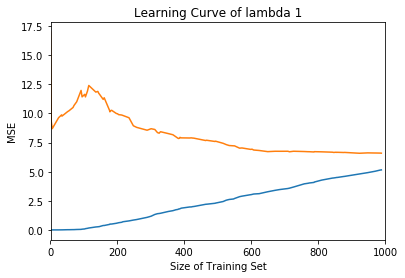

In [42]:
learning_curve(data_train_1000_100,data_test_1000_100,1,"1000-100")

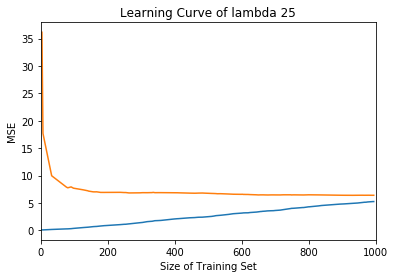

In [43]:
learning_curve(data_train_1000_100,data_test_1000_100,25,"1000-100")

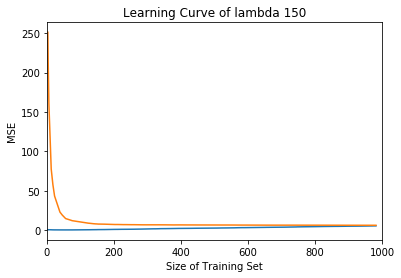

In [44]:
learning_curve(data_train_1000_100,data_test_1000_100,150,"1000-100")